In [1]:
from hyperopt import hp
from hyperopt.pyll.base import scope

import DatasetRun
from KNNClassifier import KNNClassifier
from KMeans import KMeans
import Metrics

In [2]:
device = DatasetRun.get_device()

Device used: cuda


Sample run

In [3]:
metric = Metrics.MahalanobisMetric(shrinkage=True, gamma_1=0.8, gamma_2=1.6, normalization=True)
kmeans = KMeans(n_clusters=50, metric=Metrics.CosineMetric())
clf = KNNClassifier(n_neighbors=3,
                    metric=metric,
                    tukey_lambda=1,
                    kmeans=kmeans,
                    device=device)
_ = DatasetRun.train(clf, 10, 'tasks1', verbose=True)

task 0: (time: 1.549)
Paper accuracy: 97.900; Mahalanobis knn accuracy: 98.200
task 1: (time: 1.823)
Paper accuracy: 94.850; Mahalanobis knn accuracy: 94.950
task 2: (time: 3.168)
Paper accuracy: 92.367; Mahalanobis knn accuracy: 92.933
task 3: (time: 4.829)
Paper accuracy: 90.400; Mahalanobis knn accuracy: 91.025
task 4: (time: 6.682)
Paper accuracy: 89.280; Mahalanobis knn accuracy: 89.720
task 5: (time: 9.162)
Paper accuracy: 88.300; Mahalanobis knn accuracy: 88.583
task 6: (time: 11.929)
Paper accuracy: 87.514; Mahalanobis knn accuracy: 87.600
task 7: (time: 15.040)
Paper accuracy: 86.600; Mahalanobis knn accuracy: 86.737
task 8: (time: 18.668)
Paper accuracy: 86.567; Mahalanobis knn accuracy: 86.722
task 9: (time: 22.828)
Paper accuracy: 85.670; Mahalanobis knn accuracy: 85.890


## Grid search

In [3]:
def train_grid(params):
    n_neighbors = params['n_neighbors']
    gamma_1 = params['gamma_1']
    gamma_2 = params['gamma_2']
    n_tasks = params['n_tasks']
    metric = Metrics.MahalanobisMetric(shrinkage=True, gamma_1=gamma_1, gamma_2=gamma_2, normalization=True)
    return -DatasetRun.train(n_neighbors, metric, 1, device, n_tasks, 'tasks1', verbose=False)[-1]

search_space = {
    'n_neighbors': scope.int(hp.quniform('n_neighbors', 1, 30, 1)),
    'gamma_1': hp.uniform('gamma_1', 0.0001, 3.0),
    'gamma_2': hp.uniform('gamma_2', 0.0001, 3.0),
    'n_tasks': 5  # Training on only part of the tasks to hasten the process
}

trials, best = DatasetRun.grid_search(train_grid, search_space, 500)

print("Best hyperparameters:", best)

100%|██████████| 500/500 [11:23:29<00:00, 82.02s/trial, best loss: -0.8966]   
Best hyperparameters: {'gamma_1': 0.7982332477830325, 'gamma_2': 1.5925557871529379, 'n_neighbors': 1.0}


plot accuracy over trials (to check how well did the grid search work)

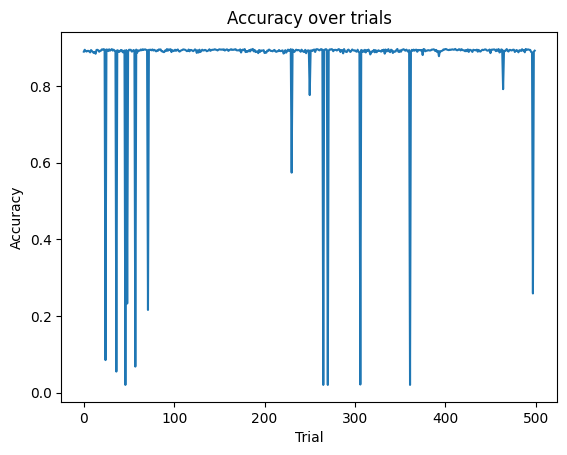

In [4]:
DatasetRun.plot_accuracy_trials(trials)

plot accuracies against hyperparameters' values 

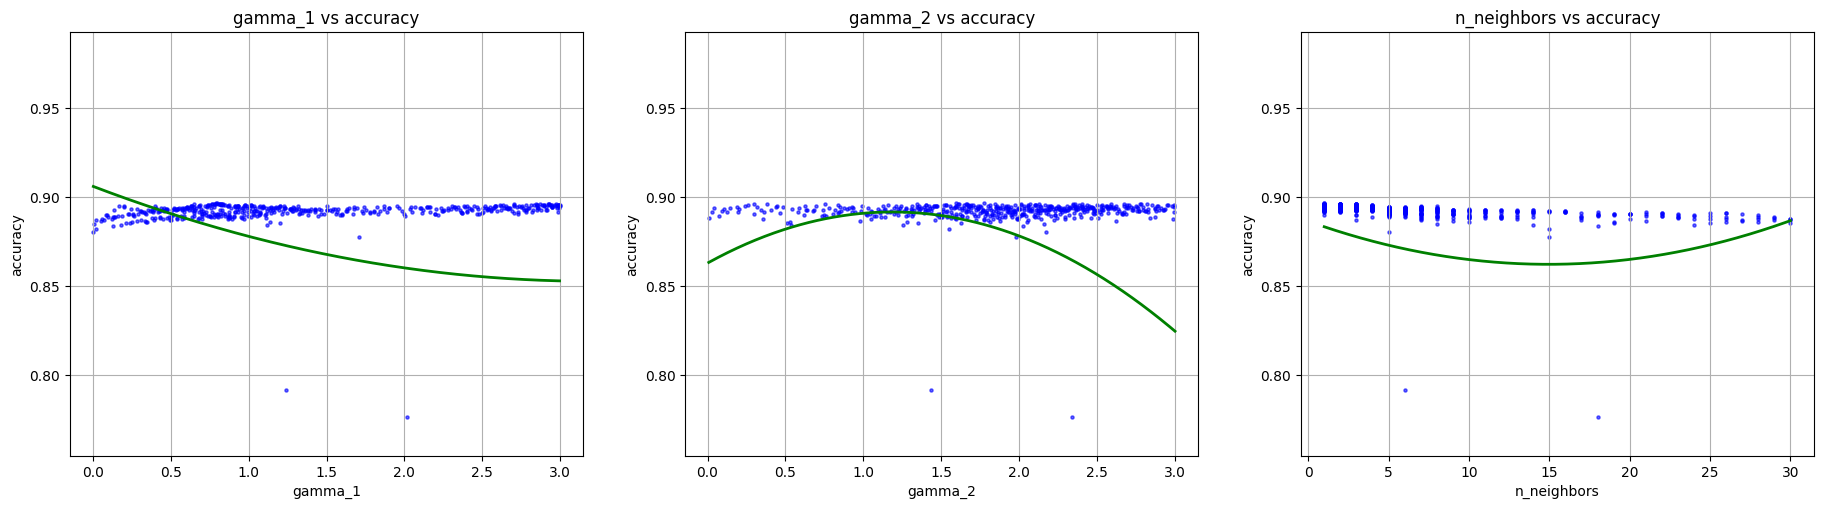

In [37]:
DatasetRun.plot_hyperparameters(trials, deg=2)

In [32]:
DatasetRun.print_results(trials, 50)

Top 50 Results:
Trial 1:
  Accuracy: 0.8966
  Parameters:
    gamma_1: 0.7982
    gamma_2: 1.5926
    n_neighbors: 1.0000
------------------------------
Trial 2:
  Accuracy: 0.8966
  Parameters:
    gamma_1: 0.7917
    gamma_2: 1.7733
    n_neighbors: 1.0000
------------------------------
Trial 3:
  Accuracy: 0.8964
  Parameters:
    gamma_1: 0.8139
    gamma_2: 2.0690
    n_neighbors: 2.0000
------------------------------
Trial 4:
  Accuracy: 0.8964
  Parameters:
    gamma_1: 0.8084
    gamma_2: 2.0128
    n_neighbors: 2.0000
------------------------------
Trial 5:
  Accuracy: 0.8964
  Parameters:
    gamma_1: 0.7805
    gamma_2: 1.3443
    n_neighbors: 1.0000
------------------------------
Trial 6:
  Accuracy: 0.8962
  Parameters:
    gamma_1: 2.9750
    gamma_2: 2.4025
    n_neighbors: 3.0000
------------------------------
Trial 7:
  Accuracy: 0.8962
  Parameters:
    gamma_1: 2.8463
    gamma_2: 2.3603
    n_neighbors: 3.0000
------------------------------
Trial 8:
  Accuracy: 0.89